# Predicting Olympic Medal Counts Project
### Daniel Nyingcho Fusi

In [3]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Project Step 1.   Data Preprocessing

In [6]:
# importing dataset

data = pd.read_csv("file2.csv")
print(data.head())

   iso  ioc        name      continent  population            gdp  \
0  ARG  ARG   Argentina  South America    45376763   383066977654   
1  ARM  ARM     Armenia           Asia     2963234    12645459214   
2  AUS  AUS   Australia        Oceania    25687041  1330900925057   
3  AUT  AUT     Austria         Europe     8917205   428965397959   
4  AZE  AZE  Azerbaijan         Europe    10110116    42607176471   

   olympics_index  sports_index  olympicsIndex  sportsIndex  total  gold  \
0       19.597142      9.324537      19.597142     9.324537      3     0   
1       19.681457     13.497324      19.681457    13.497324      4     0   
2       31.170099     11.073845      31.170099    11.073845     46    17   
3       12.212139     15.923033      12.212139    15.923033      7     1   
4       18.213838     13.103344      18.213838    13.103344      7     0   

   silver  bronze  
0       1       2  
1       2       2  
2       7      22  
3       1       5  
4       3       4  


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             93 non-null     object 
 1   ioc             93 non-null     object 
 2   name            93 non-null     object 
 3   continent       88 non-null     object 
 4   population      93 non-null     int64  
 5   gdp             93 non-null     int64  
 6   olympics_index  91 non-null     float64
 7   sports_index    91 non-null     float64
 8   olympicsIndex   93 non-null     float64
 9   sportsIndex     93 non-null     float64
 10  total           93 non-null     int64  
 11  gold            93 non-null     int64  
 12  silver          93 non-null     int64  
 13  bronze          93 non-null     int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 10.3+ KB


### - (A) Data Cleaning

In [11]:
# checking for missing values

data.isnull().sum()

iso               0
ioc               0
name              0
continent         5
population        0
gdp               0
olympics_index    2
sports_index      2
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64

In [13]:
# Replacing missing values from mean and median for numerical columns only.
data.fillna(data.mean(numeric_only = True), inplace = True)

In [15]:
# check for misssing values
data.isnull().sum()

iso               0
ioc               0
name              0
continent         5
population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64

In [17]:
# Replace missing values from mode for categorical columns only. 
data['continent'].fillna(data['continent'].mode()[0], inplace = True)

In [19]:
# check for misssing values
data.isnull().sum()

iso               0
ioc               0
name              0
continent         0
population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64

In [21]:
# checking for duplicates

data.duplicated().sum()

0

In [23]:
# Addressing inconsistencies

data['iso_ioc'] = data['iso']
data['olympics_Index'] = data['olympicsIndex']
data['sports_Index'] = data['sports_index']

In [25]:
data.head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze,iso_ioc,olympics_Index,sports_Index
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2,ARG,19.597142,9.324537
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2,ARM,19.681457,13.497324
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22,AUS,31.170099,11.073845
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5,AUT,12.212139,15.923033
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4,AZE,18.213838,13.103344


In [27]:
data.drop(["iso", "ioc", "olympics_index", "sports_index", "olympicsIndex", "sportsIndex"], axis = 1, inplace = True)

In [29]:
data.head()

,name,continent,population,gdp,total,gold,silver,bronze,iso_ioc,olympics_Index,sports_Index
0,Argentina,South America,45376763,383066977654,3,0,1,2,ARG,19.597142,9.324537
1,Armenia,Asia,2963234,12645459214,4,0,2,2,ARM,19.681457,13.497324
2,Australia,Oceania,25687041,1330900925057,46,17,7,22,AUS,31.170099,11.073845
3,Austria,Europe,8917205,428965397959,7,1,1,5,AUT,12.212139,15.923033
4,Azerbaijan,Europe,10110116,42607176471,7,0,3,4,AZE,18.213838,13.103344


### -(B): Featuring Engineering

In [32]:
# Modifying the the interactions between (gdp and population) & (olympics_Index & sports_Index)

data['INTER_POP_GDP'] = data['population'] * data['gdp']
data['INTER_OLI_SI'] = data['olympics_Index'] * data['sports_Index']

In [34]:
data['INTER_POP_GDP'].head()

0   -1064404615577697614
1      37471454688538076
2   -2706581518542016895
3    3825172391506984595
4     430763496554280636
Name: INTER_POP_GDP, dtype: int64

In [36]:
data['INTER_OLI_SI'].head()

0    182.734275
1    265.647010
2    345.172845
3    194.454291
4    238.662184
Name: INTER_OLI_SI, dtype: float64

In [38]:
INTER_POP_GDP = data['INTER_POP_GDP']
INTER_OLI_SI = data['INTER_OLI_SI']

In [40]:
data.head()

,name,continent,population,gdp,total,gold,silver,bronze,iso_ioc,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
0,Argentina,South America,45376763,383066977654,3,0,1,2,ARG,19.597142,9.324537,-1064404615577697614,182.734275
1,Armenia,Asia,2963234,12645459214,4,0,2,2,ARM,19.681457,13.497324,37471454688538076,265.647010
2,Australia,Oceania,25687041,1330900925057,46,17,7,22,AUS,31.170099,11.073845,-2706581518542016895,345.172845
3,Austria,Europe,8917205,428965397959,7,1,1,5,AUT,12.212139,15.923033,3825172391506984595,194.454291
4,Azerbaijan,Europe,10110116,42607176471,7,0,3,4,AZE,18.213838,13.103344,430763496554280636,238.662184


In [42]:
# Standardization & Normalization 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            93 non-null     object 
 1   continent       93 non-null     object 
 2   population      93 non-null     int64  
 3   gdp             93 non-null     int64  
 4   total           93 non-null     int64  
 5   gold            93 non-null     int64  
 6   silver          93 non-null     int64  
 7   bronze          93 non-null     int64  
 8   iso_ioc         93 non-null     object 
 9   olympics_Index  93 non-null     float64
 10  sports_Index    93 non-null     float64
 11  INTER_POP_GDP   93 non-null     int64  
 12  INTER_OLI_SI    93 non-null     float64
dtypes: float64(3), int64(7), object(3)
memory usage: 9.6+ KB


In [44]:
data = data.drop(columns = ['name', 'continent', 'iso_ioc'])

In [46]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   population      93 non-null     int64  
 1   gdp             93 non-null     int64  
 2   total           93 non-null     int64  
 3   gold            93 non-null     int64  
 4   silver          93 non-null     int64  
 5   bronze          93 non-null     int64  
 6   olympics_Index  93 non-null     float64
 7   sports_Index    93 non-null     float64
 8   INTER_POP_GDP   93 non-null     int64  
 9   INTER_OLI_SI    93 non-null     float64
dtypes: float64(3), int64(7)
memory usage: 7.4 KB


,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
count,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000
mean,6.639237e+07,8.668410e+11,11.612903,3.655914,3.634409,4.322581,20.232746,16.329262,3.375092e+17,316.628360
std,2.057474e+08,2.702387e+12,19.091332,7.022471,6.626339,6.210372,12.852103,8.835266,3.490981e+18,244.826317
min,3.393800e+04,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,7.396478,-9.046857e+18,0.000000
25%,4.994724e+06,4.369766e+10,2.000000,0.000000,0.000000,1.000000,12.212139,11.019952,1.225561e+14,174.201991
50%,1.132662e+07,1.698354e+11,4.000000,1.000000,1.000000,2.000000,18.213838,13.993115,3.630703e+17,249.154782
75%,4.735157e+07,5.153325e+11,11.000000,3.000000,4.000000,5.000000,26.037386,18.984764,2.071222e+18,377.563803
max,1.402112e+09,2.093660e+13,113.000000,39.000000,41.000000,33.000000,100.000000,72.227313,7.117879e+18,1544.013935


In [48]:
# importing ecessary library

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Standardization
scaleStandard = StandardScaler()

In [52]:
X1 = data.iloc[:, 0:10]

In [54]:
X1 = scaleStandard.fit_transform(X1)

In [56]:
X1 = pd.DataFrame(X1,columns = ['population', 'gdp', 'total', 'gold', 'silver', 'bronze', 'olympics_Index', 'sports_Index', 'INTER_POP_GDP', 'INTER_OLI_SI'])

In [58]:
X1.head()

,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
0,-0.102696,-0.179988,-0.453587,-0.523424,-0.399721,-0.376011,-0.049723,-0.797111,-0.403758,-0.549858
1,-0.309957,-0.317802,-0.400924,-0.523424,-0.247990,-0.376011,-0.043127,-0.322264,-0.086412,-0.209363
2,-0.198914,0.172653,1.810952,1.910497,0.510664,2.861863,0.855629,-0.598047,-0.876713,0.117223
3,-0.280862,-0.162911,-0.242933,-0.380252,-0.399721,0.109670,-0.627452,-0.046227,1.004465,-0.501728
4,-0.275033,-0.306655,-0.242933,-0.523424,-0.096259,-0.052224,-0.157939,-0.367097,0.026858,-0.320181


In [60]:
X1.describe().round(3)

,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
count,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000
mean,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005,1.005
min,-0.324,-0.323,-0.559,-0.523,-0.551,-0.700,-1.583,-1.017,-2.703,-1.300
25%,-0.300,-0.306,-0.506,-0.523,-0.551,-0.538,-0.627,-0.604,-0.097,-0.585
50%,-0.269,-0.259,-0.401,-0.380,-0.400,-0.376,-0.158,-0.266,0.007,-0.277
75%,-0.093,-0.131,-0.032,-0.094,0.055,0.110,0.454,0.302,0.499,0.250
max,6.527,7.467,5.339,5.060,5.670,4.643,6.240,6.361,1.953,5.040


In [62]:
# Normalisation

X2 = data.iloc[:, 0:10]
scaleMinMax = MinMaxScaler(feature_range=(0,1))

In [64]:
X2 = scaleMinMax.fit_transform(X2)

In [66]:
X2 = pd.DataFrame(X2,columns = ['population', 'gdp', 'total', 'gold', 'silver', 'bronze', 'olympics_Index', 'sports_Index', 'INTER_POP_GDP', 'INTER_OLI_SI'])

In [68]:
X2.head()

,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
0,0.032340,0.018297,0.017857,0.000000,0.024390,0.060606,0.195971,0.029740,0.493819,0.118350
1,0.002089,0.000604,0.026786,0.000000,0.048780,0.060606,0.196815,0.094104,0.561984,0.172050
2,0.018296,0.063568,0.401786,0.435897,0.170732,0.666667,0.311701,0.056723,0.392229,0.223556
3,0.006336,0.020489,0.053571,0.025641,0.024390,0.151515,0.122121,0.131520,0.796303,0.125941
4,0.007187,0.002035,0.053571,0.000000,0.073171,0.121212,0.182138,0.088027,0.586315,0.154573


In [70]:
X2.describe().round(3)

,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
count,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000
mean,0.047,0.041,0.095,0.094,0.089,0.131,0.202,0.138,0.581,0.205
std,0.147,0.129,0.170,0.180,0.162,0.188,0.129,0.136,0.216,0.159
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.004,0.002,0.009,0.000,0.000,0.030,0.122,0.056,0.560,0.113
50%,0.008,0.008,0.027,0.026,0.024,0.061,0.182,0.102,0.582,0.161
75%,0.034,0.025,0.089,0.077,0.098,0.152,0.260,0.179,0.688,0.245
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### - (C): Data Splitting

In [73]:
data.head()

,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
0,45376763,383066977654,3,0,1,2,19.597142,9.324537,-1064404615577697614,182.734275
1,2963234,12645459214,4,0,2,2,19.681457,13.497324,37471454688538076,265.647010
2,25687041,1330900925057,46,17,7,22,31.170099,11.073845,-2706581518542016895,345.172845
3,8917205,428965397959,7,1,1,5,12.212139,15.923033,3825172391506984595,194.454291
4,10110116,42607176471,7,0,3,4,18.213838,13.103344,430763496554280636,238.662184


In [75]:
# importing necessary library

from sklearn.model_selection import train_test_split

In [77]:
X = data.drop(columns=['total', 'gold', 'silver', 'bronze'])

In [79]:
y = data['total']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

In [83]:
X_train.head()

,population,gdp,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
87,44134693,155582008717,18.783582,14.344996,6866564191048118881,269.450395
21,83240525,3806060140125,13.214569,9.994876,3223794992516188153,132.077976
49,18754440,169835426427,38.982625,12.225946,3185168314799585880,476.599451
20,10698896,243530379897,27.006400,14.492386,2605506207358493712,391.387184
56,36910558,112870591694,7.149706,21.298577,4166116521215705252,152.278564


In [85]:
y_train.head()

87    19
21    37
49     8
20    11
56     1
Name: total, dtype: int64

# Project Step 2:  Exploratory Data Analysis (EDA)  

### -(A) Descriptive Statistics

In [89]:
#  compute Mean, Median and Standard Deviation

mean = data.mean()
median = data.median()
std_dev = data.std()

In [91]:
# Display Results

print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nStandard Deviation:\n", std_dev)

Mean:
 population        6.639237e+07
gdp               8.668410e+11
total             1.161290e+01
gold              3.655914e+00
silver            3.634409e+00
bronze            4.322581e+00
olympics_Index    2.023275e+01
sports_Index      1.632926e+01
INTER_POP_GDP     3.375092e+17
INTER_OLI_SI      3.166284e+02
dtype: float64

Median:
 population        1.132662e+07
gdp               1.698354e+11
total             4.000000e+00
gold              1.000000e+00
silver            1.000000e+00
bronze            2.000000e+00
olympics_Index    1.821384e+01
sports_Index      1.399311e+01
INTER_POP_GDP     3.630703e+17
INTER_OLI_SI      2.491548e+02
dtype: float64

Standard Deviation:
 population        2.057474e+08
gdp               2.702387e+12
total             1.909133e+01
gold              7.022471e+00
silver            6.626339e+00
bronze            6.210372e+00
olympics_Index    1.285210e+01
sports_Index      8.835266e+00
INTER_POP_GDP     3.490981e+18
INTER_OLI_SI      2.448263e+02
d

### -(B): Visualizations:

In [94]:
data.head()

,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
0,45376763,383066977654,3,0,1,2,19.597142,9.324537,-1064404615577697614,182.734275
1,2963234,12645459214,4,0,2,2,19.681457,13.497324,37471454688538076,265.647010
2,25687041,1330900925057,46,17,7,22,31.170099,11.073845,-2706581518542016895,345.172845
3,8917205,428965397959,7,1,1,5,12.212139,15.923033,3825172391506984595,194.454291
4,10110116,42607176471,7,0,3,4,18.213838,13.103344,430763496554280636,238.662184


In [96]:
# importing necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt
colors = np.random.rand(100)

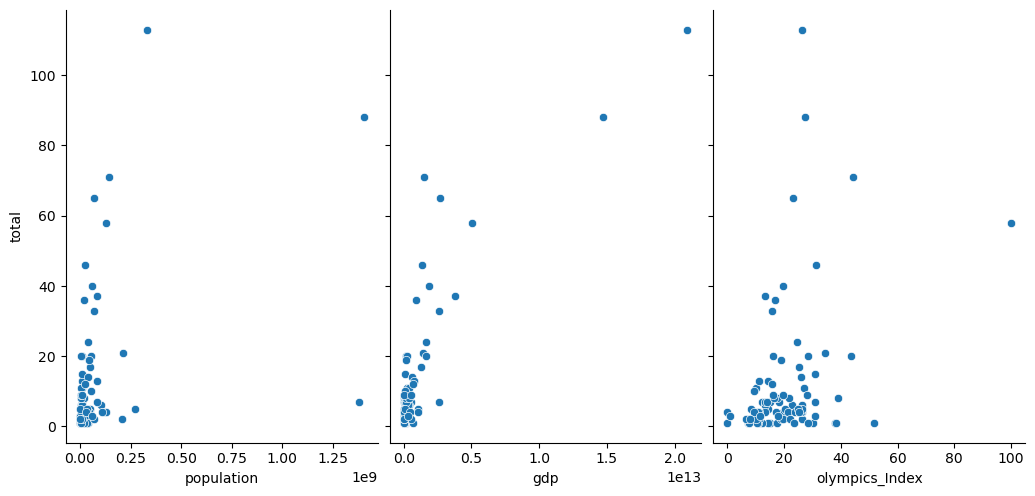

In [98]:
# scattered plots
sns.pairplot(data, x_vars=['population', 'gdp', 'olympics_Index'], y_vars='total', height=5, aspect=0.7)

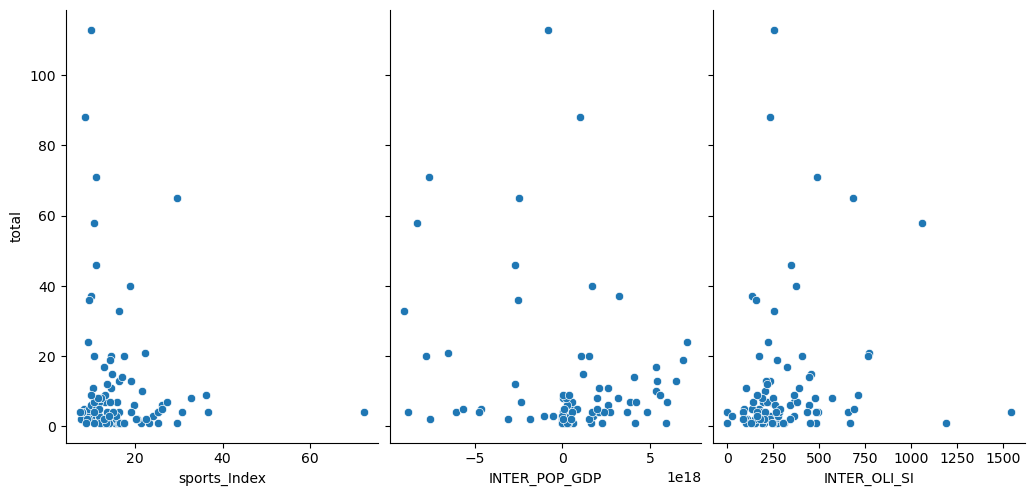

In [100]:
# scattered plots
sns.pairplot(data, x_vars=['sports_Index', 'INTER_POP_GDP', 'INTER_OLI_SI'], y_vars='total', height=5, aspect=0.7)

In [102]:
total = data['total']
population = data['population']
bins = 20

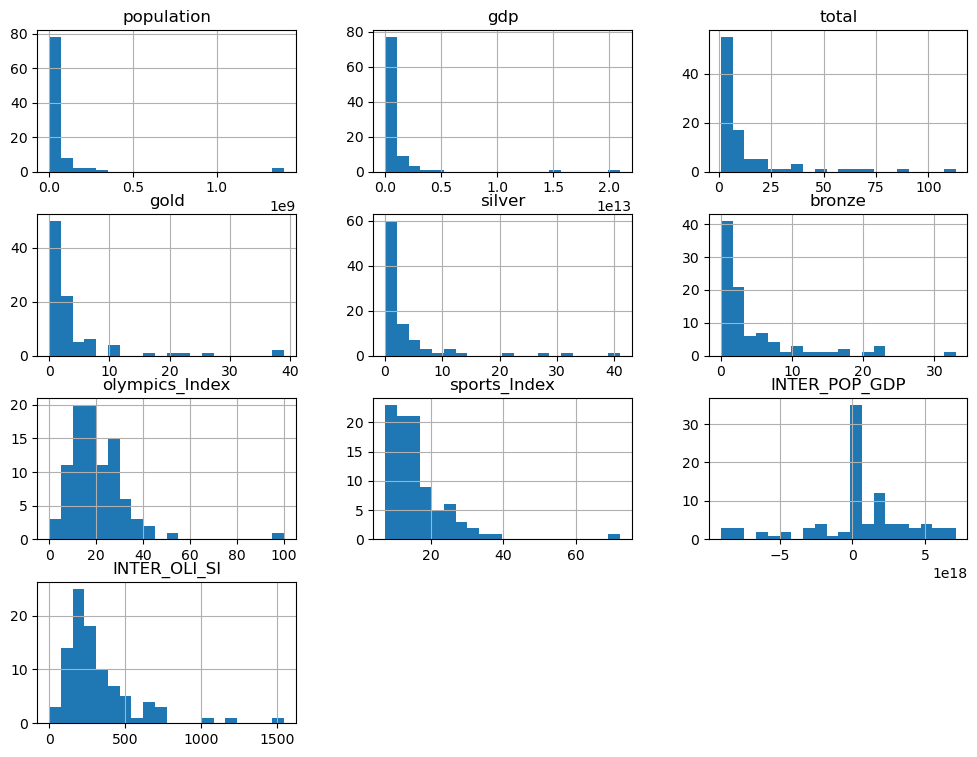

In [104]:
data.hist(bins = 20, figsize=(12, 9))
plt.show()

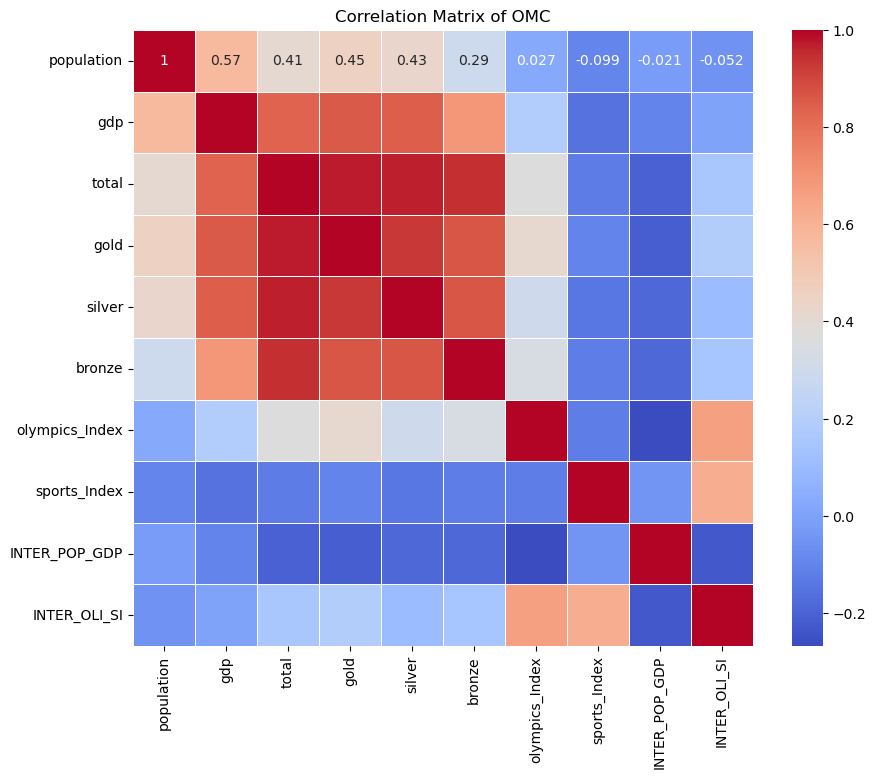

In [105]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of OMC')
plt.show()

# Project Step 3: Machine Learning Models

### -(A) Linear Regression

In [110]:
# import relavant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
# select relavant features and prepare dataset for training

data.head()

,population,gdp,total,gold,silver,bronze,olympics_Index,sports_Index,INTER_POP_GDP,INTER_OLI_SI
0,45376763,383066977654,3,0,1,2,19.597142,9.324537,-1064404615577697614,182.734275
1,2963234,12645459214,4,0,2,2,19.681457,13.497324,37471454688538076,265.647010
2,25687041,1330900925057,46,17,7,22,31.170099,11.073845,-2706581518542016895,345.172845
3,8917205,428965397959,7,1,1,5,12.212139,15.923033,3825172391506984595,194.454291
4,10110116,42607176471,7,0,3,4,18.213838,13.103344,430763496554280636,238.662184


In [114]:
features = data[['population', 'gdp', 'olympics_Index', 'sports_Index']]
target_feature = data['total']
X = features
y = target_feature

In [116]:
# Split dataset into training & testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [235]:
X.head()

,population,gdp,olympics_index,sports_index
0,45376763,383066977654,19.597142,9.324537
1,2963234,12645459214,19.681457,13.497324
2,25687041,1330900925057,31.170099,11.073845
3,8917205,428965397959,12.212139,15.923033
4,10110116,42607176471,18.213838,13.103344


In [237]:
X_train.head()

,population,gdp,olympics_index,sports_index
65,5379475,362008956545,16.528951,11.539037
15,8636896,747968636174,14.198266,16.375086
68,37950802,594164690895,25.995830,17.014068
78,2100126,52880473700,26.272739,26.220728
30,896444,4376014756,19.692826,11.739559


In [118]:
# Creating a Linear Regrassion Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
# make predictions
y_pred = model.predict(X_test)

In [122]:
# calc Mean Absolute Error (MAE)  & R-Squred

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [124]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 4.268625454155629
R-squared: 0.15997330430161727


### -(B): Decision Trees:

In [127]:
# Decision trees regression

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [129]:
y_pred = regressor.predict(X_test)

In [131]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [133]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 178.31578947368422
R^2 Score: -4.244582043343653


### -(C): Random Forest:

In [136]:
rfr = RandomForestRegressor(random_state=42)

In [138]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [140]:
y_pred = rfr.predict(X_test)

In [142]:
mean_absolute_error(y_pred, y_test)

5.813684210526316

In [144]:
mean_squared_error(y_pred, y_test)

84.54931578947371

In [146]:
r2_score(y_pred, y_test)

0.4064926746752089

In [148]:
# Hyperparameter Tunning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [150]:
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

In [152]:
rfr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [154]:
y_pred = rfr_cv.predict(X_test)

In [156]:
mean_absolute_error(y_pred, y_test)

6.419290517961571

In [158]:
mean_squared_error(y_pred, y_test)

104.98668583292809

In [160]:
r2_score(y_pred, y_test)

0.35544547523198

## Project Step 4.  Deep Learning Models

### -(A): Neural Network:

In [164]:
# Importing necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


2024-09-04 20:33:23.217335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [165]:
data = pd.read_csv("file2.csv")

In [168]:
X = pd.get_dummies(data.drop(['iso', 'ioc', 'name', 'continent', 'total', 'gold', 'silver', 'bronze', 'olympics_index', 'sports_index'], axis=1))
y = data['total']

In [170]:
X

,population,gdp,olympicsIndex,sportsIndex
0,45376763,383066977654,19.597142,9.324537
1,2963234,12645459214,19.681457,13.497324
2,25687041,1330900925057,31.170099,11.073845
3,8917205,428965397959,12.212139,15.923033
4,10110116,42607176471,18.213838,13.103344
...,...,...,...,...
88,329484123,20936600000000,26.161476,9.787943
89,34232050,57707189945,24.830288,11.631212
90,28435943,482400000000,25.131676,10.626971
91,1775378,7611402165,7.980882,22.469058


In [172]:
y

0       3
1       4
2      46
3       7
4       7
     ... 
88    113
89      5
90      4
91      2
92      3
Name: total, Length: 93, dtype: int64

In [174]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = to_categorical(y)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [239]:
X_train.shape

(74, 4)

In [241]:
y_test.shape

(19,)

In [178]:
# Build Model
model = Sequential()
model.add(Dense(34, input_dim=X_train.shape[1], activation='relu'))  # Input layer + hidden layer
model.add(Dense(114, activation='softmax'))  # Output layer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
# Training the model
model.fit(X_train, y_train, validation_split=0.2, validation_data=(X_test, y_test), epochs=10, batch_size=32,verbose=2)

Epoch 1/10
3/3 - 1s - 276ms/step - accuracy: 0.0135 - loss: 4.7864 - val_accuracy: 0.0000e+00 - val_loss: 4.7673
Epoch 2/10
3/3 - 0s - 12ms/step - accuracy: 0.0135 - loss: 4.7591 - val_accuracy: 0.0000e+00 - val_loss: 4.7486
Epoch 3/10
3/3 - 0s - 12ms/step - accuracy: 0.0270 - loss: 4.7329 - val_accuracy: 0.0000e+00 - val_loss: 4.7301
Epoch 4/10
3/3 - 0s - 12ms/step - accuracy: 0.0270 - loss: 4.7075 - val_accuracy: 0.0000e+00 - val_loss: 4.7122
Epoch 5/10
3/3 - 0s - 12ms/step - accuracy: 0.0405 - loss: 4.6821 - val_accuracy: 0.0000e+00 - val_loss: 4.6950
Epoch 6/10
3/3 - 0s - 12ms/step - accuracy: 0.0541 - loss: 4.6568 - val_accuracy: 0.0000e+00 - val_loss: 4.6774
Epoch 7/10
3/3 - 0s - 12ms/step - accuracy: 0.0541 - loss: 4.6320 - val_accuracy: 0.0000e+00 - val_loss: 4.6598
Epoch 8/10
3/3 - 0s - 64ms/step - accuracy: 0.0676 - loss: 4.6074 - val_accuracy: 0.1053 - val_loss: 4.6422
Epoch 9/10
3/3 - 0s - 15ms/step - accuracy: 0.0811 - loss: 4.5813 - val_accuracy: 0.1053 - val_loss: 4.6250

In [182]:
# Evaluate 
loss_1, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Model - Loss: {loss_1:.4f}, Accuracy: {accuracy:.4f}")

Model - Loss: 4.6074, Accuracy: 0.1053


In [184]:
# Hyperparameter Tuning
learning_rates = [0.001, 0.02, 0.4]
epochs_list = [10, 20, 30]
neurons = [10,32, 64]
weight_constraint = [1, 2, 3]
best_accuracy = 0
batch_size = [100, 200, 400]
best_params = {}

for lr in learning_rates:
    for epochs in epochs_list:
        print(f"Testing Learning Rate: {lr}, Epochs: {epochs}")
        
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'epochs': epochs}

print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy:.4f}")


Testing Learning Rate: 0.001, Epochs: 10
Testing Learning Rate: 0.001, Epochs: 20
Testing Learning Rate: 0.001, Epochs: 30
Testing Learning Rate: 0.02, Epochs: 10
Testing Learning Rate: 0.02, Epochs: 20
Testing Learning Rate: 0.02, Epochs: 30
Testing Learning Rate: 0.4, Epochs: 10
Testing Learning Rate: 0.4, Epochs: 20
Testing Learning Rate: 0.4, Epochs: 30
Best Parameters: {'learning_rate': 0.001, 'epochs': 10}, Best Accuracy: 0.1053


## Project Step 5: Model Evaluation

### -(A): Performance Metrics:

In [188]:
data.head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4


In [190]:
data.fillna(data.mean(numeric_only = True), inplace = True)

In [192]:
data['continent'].fillna(data['continent'].mode()[0], inplace = True)

In [194]:
data.isnull().sum()

iso               0
ioc               0
name              0
continent         0
population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64

#### Performance Metrics for Gold Medals

In [197]:
features = data[['population', 'gdp', 'olympics_index', 'sports_index']]
target_feature = data['gold']
X = features
y = target_feature

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [201]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [203]:
y_pred = model.predict(X_test)

In [205]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [207]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 6.731819008479371
R-squared: -0.8693743554315791


#### Performance Metrics for Silver Medals

In [210]:
features = data[['population', 'gdp', 'olympics_index', 'sports_index']]
target_feature = data['silver']
X = features
y = target_feature

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [214]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [216]:
y_pred = model.predict(X_test)

In [218]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [220]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 4.150434180578179
R-squared: 0.21636676820673495


#### Performance Metrics for Bronze Medals

In [223]:
features = data[['population', 'gdp', 'olympics_index', 'sports_index']]
target_feature = data['bronze']
X = features
y = target_feature

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [227]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [229]:
y_pred = model.predict(X_test)

In [231]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [233]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 4.836243522052161
R-squared: 0.29940452991138433
